# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [65]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [66]:
customers = pd.read_csv('C:\Ironhack\Exercises\week_8_labs\lab-unsupervised-learning/Wholesale customers data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\erik\AppData\Local\Temp\ipykernel_34692\1009834888.py:1: SyntaxWarning: invalid escape sequence '\I'
  customers = pd.read_csv('C:\Ironhack\Exercises\week_8_labs\lab-unsupervised-learning/Wholesale customers data.csv')


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [67]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [68]:
customers.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [69]:
customers.duplicated().sum()

0

In [70]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [71]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


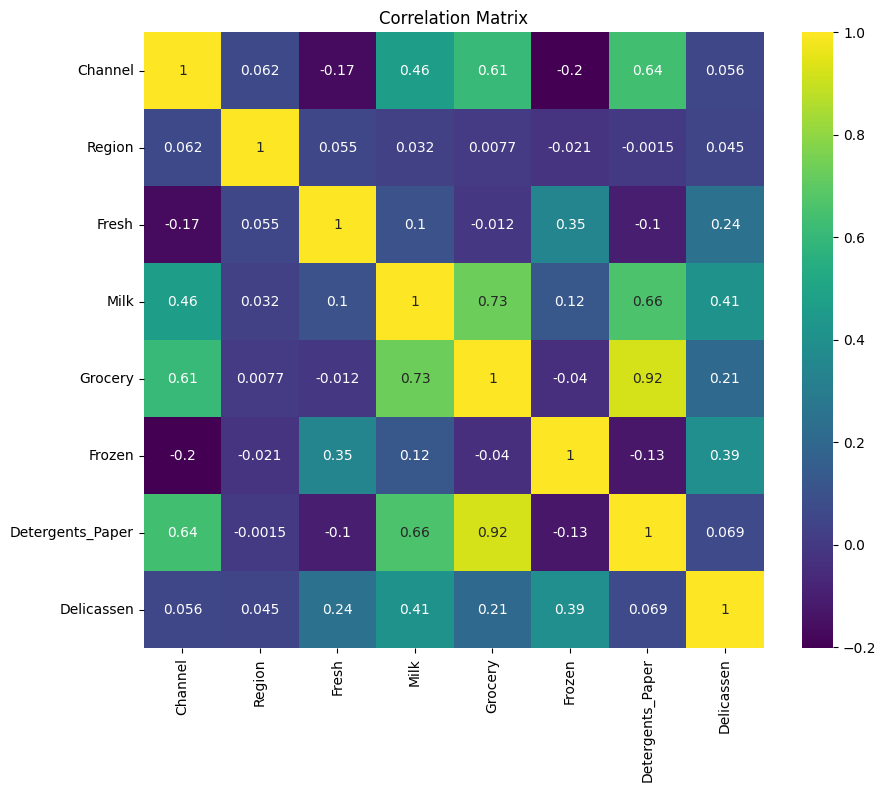

In [72]:
# Check for column collinearity
correlation_matrix = customers.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [73]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [74]:
# Convert 'Channel' and 'Region' to categorical
customers['Channel'] = customers['Channel'].astype('category')
customers['Region'] = customers['Region'].astype('category')

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [75]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the dataset excluding the 'Channel' and 'Region' columns
customers_scale = scaler.fit_transform(customers.drop(['Channel', 'Region'], axis=1))

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [76]:
# Initialize the KMeans model with a random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model on the scaled data
kmeans.fit(customers_scale)

# Assign the labels back to the original dataframe
customers['labels'] = kmeans.labels_

customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`.

In [77]:
customers['labels'].value_counts()

labels
3    272
0     96
1     59
2     11
4      2
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [78]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5)

dbscan.fit(customers_scale)

# Assign the labels back to the original dataframe
customers['labels_DBSCAN'] = dbscan.labels_

customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,3,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,3,0
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


Count the values in `labels_DBSCAN`.

In [79]:
customers['labels_DBSCAN'].value_counts()

labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

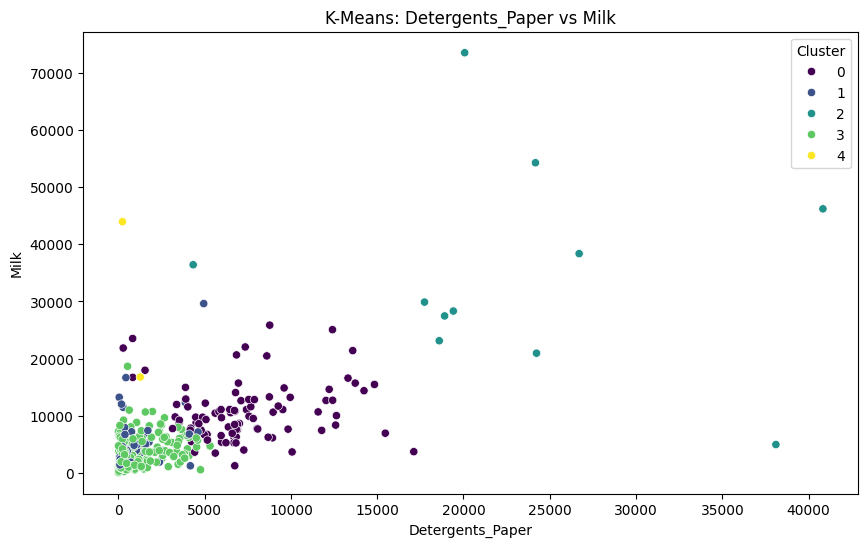

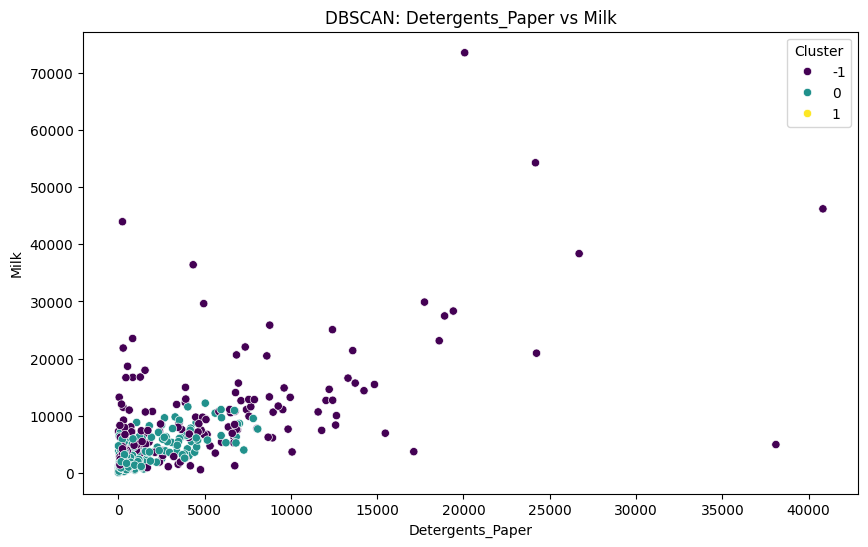

In [80]:
# K-Means scatter plot for Detergents_Paper vs Milk
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels'], palette='viridis')
plt.title('K-Means: Detergents_Paper vs Milk')
plt.legend(title='Cluster')
plt.show()

# DBSCAN scatter plot for Detergents_Paper vs Milk
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN: Detergents_Paper vs Milk')
plt.legend(title='Cluster')
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

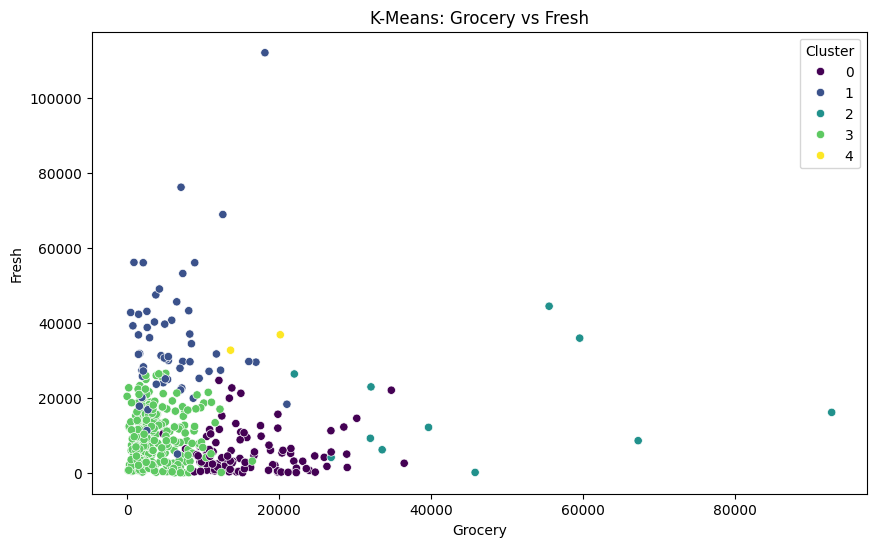

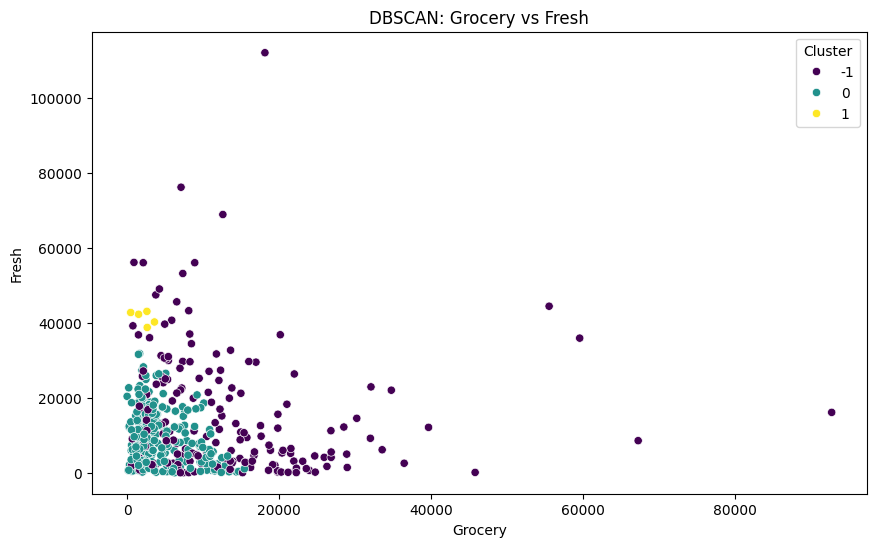

In [81]:
# K-Means scatter plot for Grocery vs Fresh
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels'], palette='viridis')
plt.title('K-Means: Grocery vs Fresh')
plt.legend(title='Cluster')
plt.show()

# DBSCAN scatter plot for Grocery vs Fresh
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN: Grocery vs Fresh')
plt.legend(title='Cluster')
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

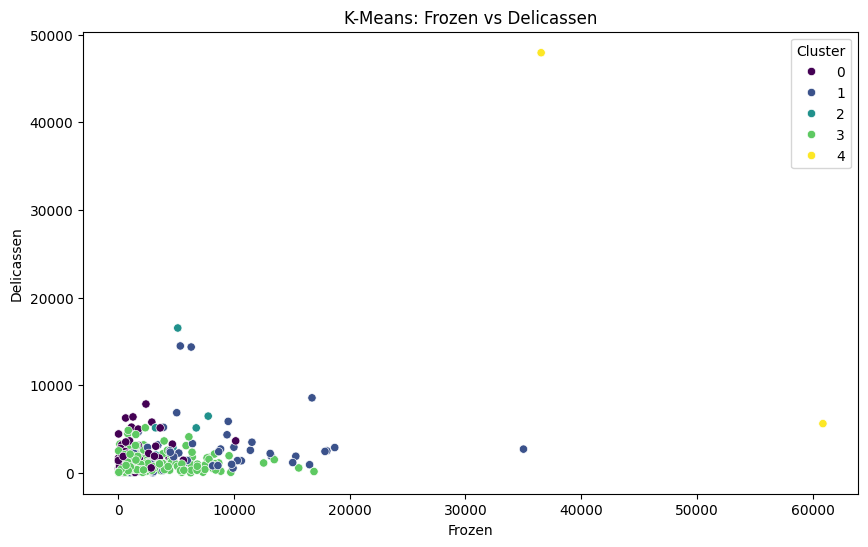

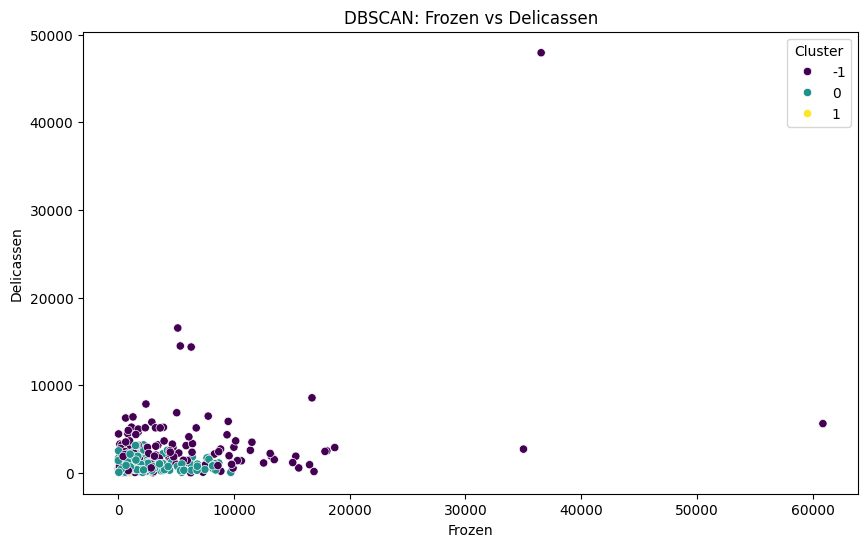

In [82]:
# K-Means scatter plot for Frozen vs Delicassen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels'], palette='viridis')
plt.title('K-Means: Frozen vs Delicassen')
plt.legend(title='Cluster')
plt.show()

# DBSCAN scatter plot for Frozen vs Delicassen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels_DBSCAN'], palette='viridis')
plt.title('DBSCAN: Frozen vs Delicassen')
plt.legend(title='Cluster')
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [83]:
# Select only numerical columns for mean computation
numerical_columns = customers.select_dtypes(include=['int64', 'float64'])

# Group by 'labels' and compute means for numerical columns
groupby_labels_mean = numerical_columns.groupby(customers['labels']).mean()

# Group by 'labels_DBSCAN' and compute means for numerical columns
groupby_labels_DBSCAN_mean = numerical_columns.groupby(customers['labels_DBSCAN']).mean()

groupby_labels_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667,-0.718750
1,34188.627119,4850.576271,5870.000000,7215.559322,955.847458,2491.796610,-0.745763
2,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636,-1.000000
3,9112.235294,2965.404412,3783.702206,2413.591912,976.908088,974.926471,-0.158088
4,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000,-1.000000


In [84]:
groupby_labels_DBSCAN_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,-1.0
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,0.0
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.0


Which algorithm appears to perform better?

In [85]:
''' Thanks gpt, doesnt even need to reed, Lera
K-Means Clustering Observations
K-Means has identified diverse clusters, with each cluster exhibiting distinct spending patterns. For example:
Cluster 1 shows very high spending in Fresh products compared to other clusters.
Cluster 2 has extremely high spending in Milk, Grocery, and Detergents_Paper, indicating customers that might be large retailers or grocery stores.
The presence of negative values in labels_DBSCAN column indicates that many points from these clusters were considered as outliers/noise by DBSCAN.
DBSCAN Clustering Observations
DBSCAN has effectively identified outliers (label -1), a core cluster of typical customers (label 0), and a distinct cluster of customers (label 1) with exceptionally high spending on Fresh products but low spending elsewhere, indicating a specialization.
The ability to detect outliers can be particularly useful in identifying atypical customers or noise in the dataset.
Comparison and Performance
Diversity and Specificity: K-Means provides a more diversified view of the customer base, creating segments that can cater to different marketing strategies. However, it does not inherently differentiate between typical and atypical spending patterns as DBSCAN does.
Outlier Handling: DBSCAN's strength lies in its ability to handle outliers and identify core and noise points within the dataset. It has clearly separated out extreme spenders and those with unique spending habits, which K-Means does not inherently do.
Conclusion
If the goal is to understand general spending patterns and segment customers into clearly defined groups for targeted marketing, K-Means may perform better due to its ability to create diverse, easily interpretable clusters.
If identifying outliers, understanding the structure of the data, and segmenting based on density (e.g., finding niche customer groups) are more critical, DBSCAN appears to perform better. It effectively identifies unusual spending patterns and differentiates them from the core customer base.
The choice of the "better" algorithm depends on the specific goals of the analysis. If outlier detection and handling are crucial, DBSCAN shows a clear advantage. If broader customer segmentation for marketing or strategy development is the goal, K-Means offers valuable insights with its clear and diverse segmentation.
'''

' Thanks gpt, doesnt even need to reed, Lera\nK-Means Clustering Observations\nK-Means has identified diverse clusters, with each cluster exhibiting distinct spending patterns. For example:\nCluster 1 shows very high spending in Fresh products compared to other clusters.\nCluster 2 has extremely high spending in Milk, Grocery, and Detergents_Paper, indicating customers that might be large retailers or grocery stores.\nThe presence of negative values in labels_DBSCAN column indicates that many points from these clusters were considered as outliers/noise by DBSCAN.\nDBSCAN Clustering Observations\nDBSCAN has effectively identified outliers (label -1), a core cluster of typical customers (label 0), and a distinct cluster of customers (label 1) with exceptionally high spending on Fresh products but low spending elsewhere, indicating a specialization.\nThe ability to detect outliers can be particularly useful in identifying atypical customers or noise in the dataset.\nComparison and Perform

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

For n_clusters = 2, the average silhouette_score is : 0.3998278091730005


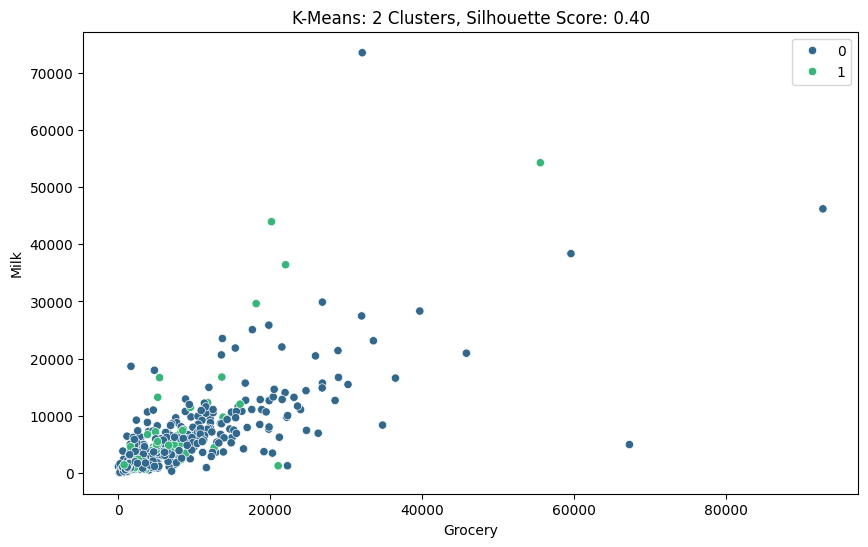

For n_clusters = 3, the average silhouette_score is : 0.4582633767207058


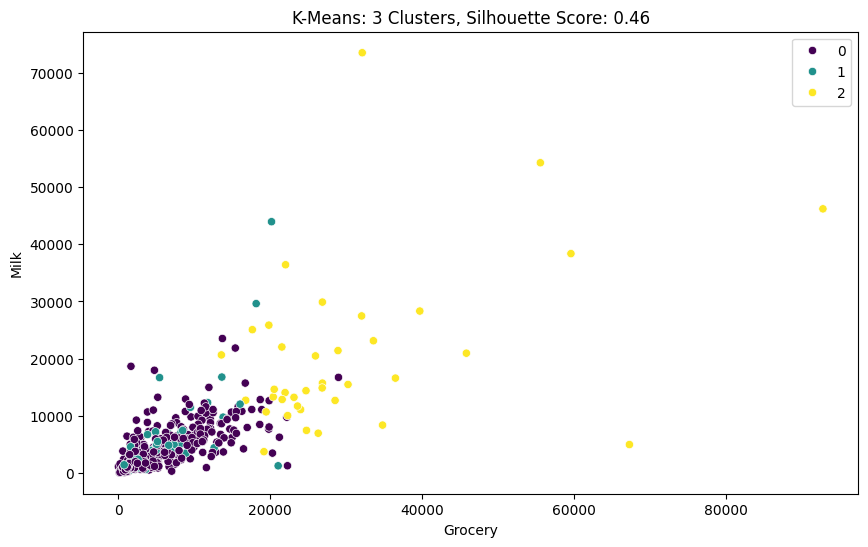

For n_clusters = 4, the average silhouette_score is : 0.34939129340421093


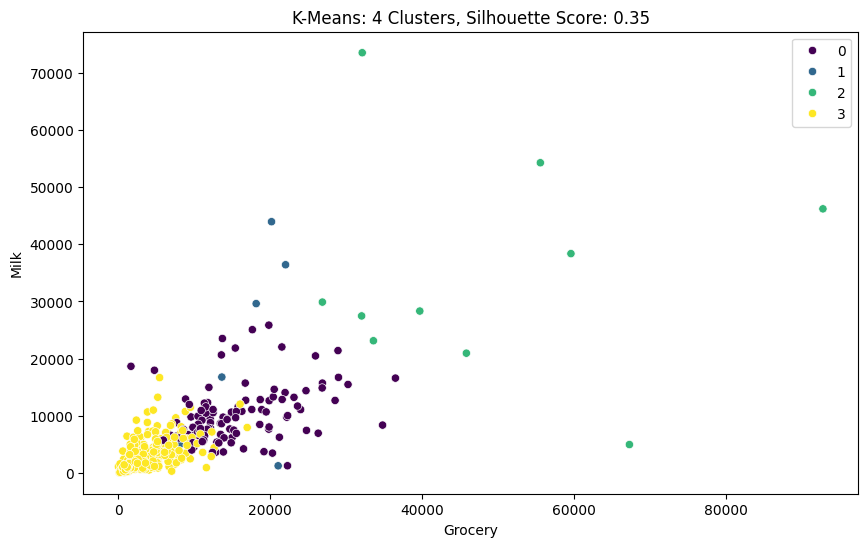

For n_clusters = 5, the average silhouette_score is : 0.36890127429678043


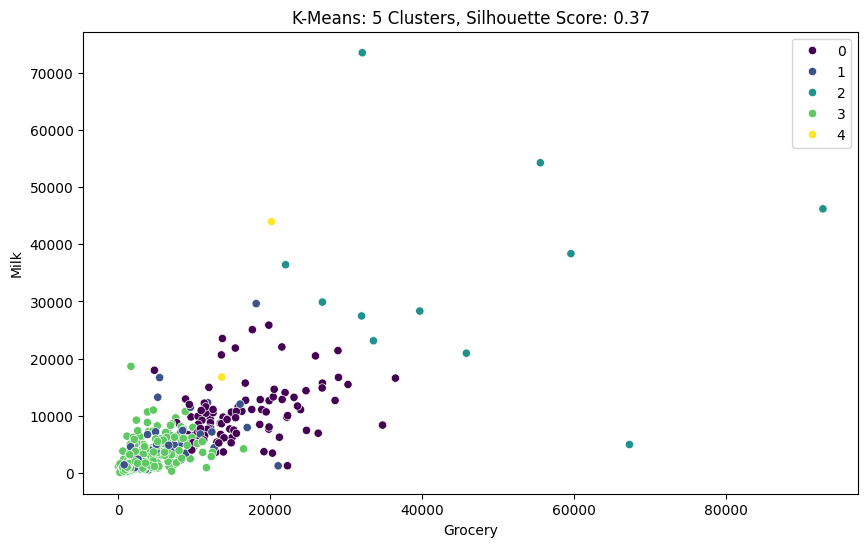

For n_clusters = 6, the average silhouette_score is : 0.2762464573058837


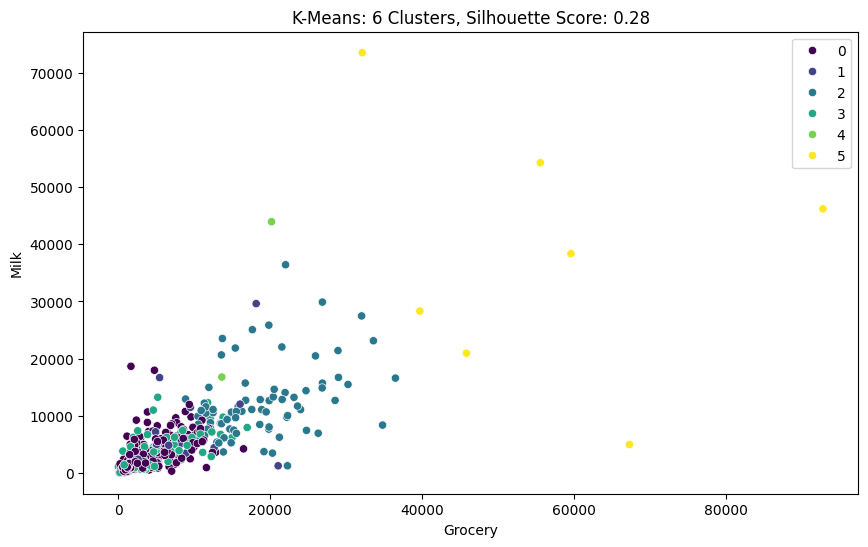

In [86]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers.drop(['Channel', 'Region', 'labels', 'labels_DBSCAN'], axis=1))

for n_clusters in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(customers_scaled)
    silhouette_avg = silhouette_score(customers_scaled, labels)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=customers['Grocery'], y=customers['Milk'], hue=labels, palette='viridis')
    plt.title(f'K-Means: {n_clusters} Clusters, Silhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Grocery')
    plt.ylabel('Milk')
    plt.show()


In [87]:
# 3 clusters have the highest silhouette score: 0.4582

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

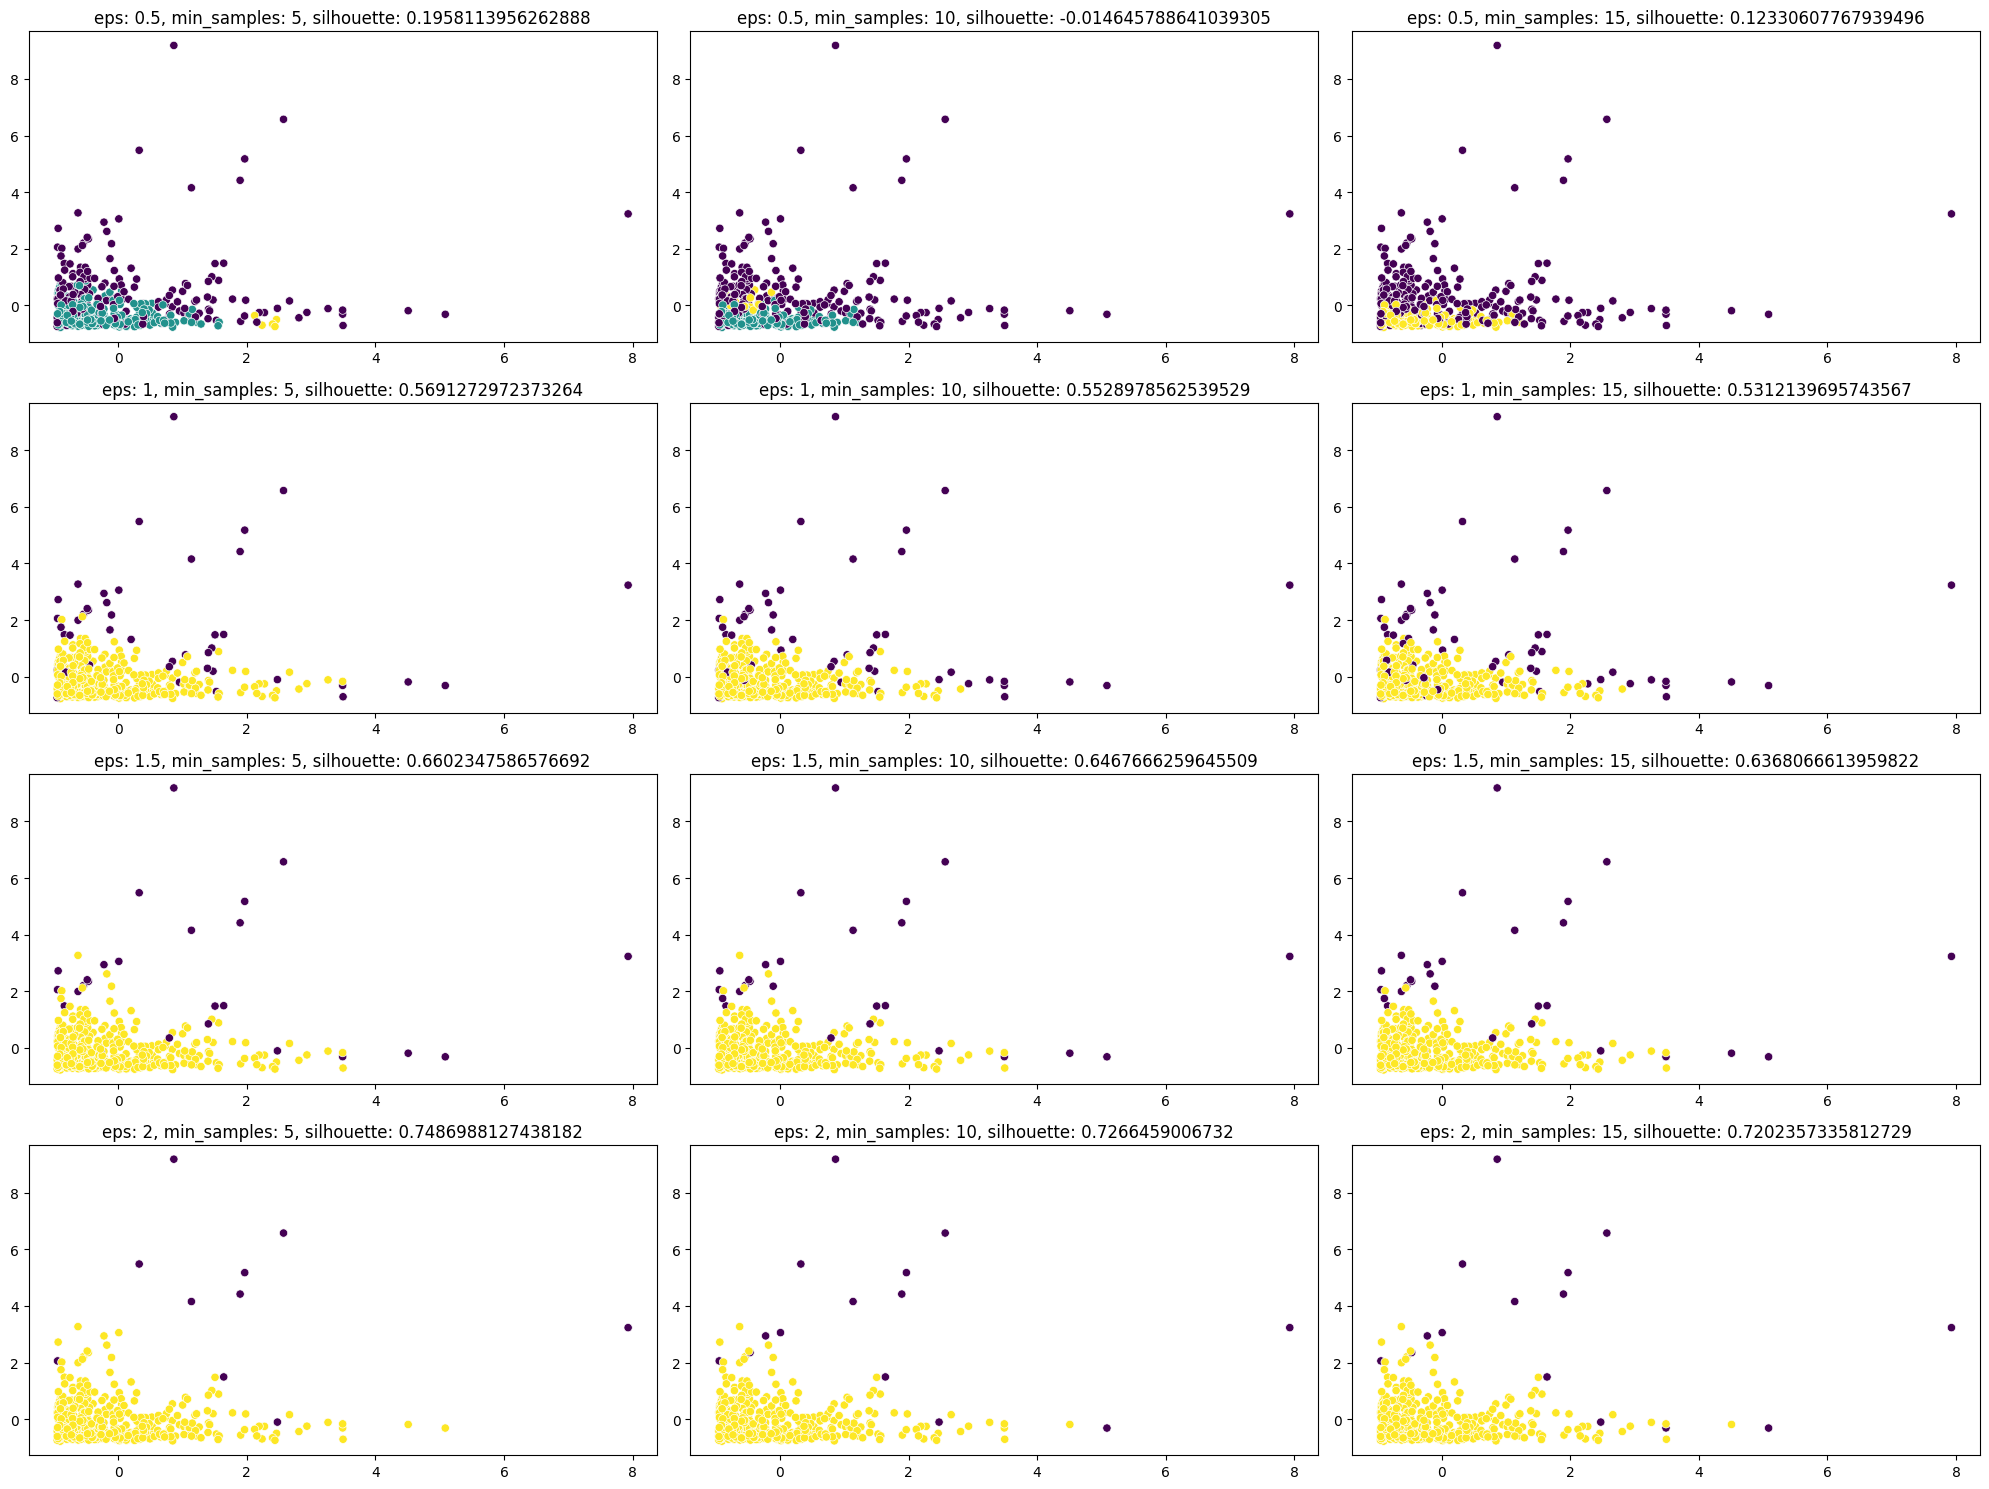

In [88]:
numerical_data = customers.drop(['Channel', 'Region', 'labels', 'labels_DBSCAN'], axis=1)

# Scaling the data
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(numerical_data)

def apply_dbscan_and_visualize(data, eps_values, min_samples_values):
    fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 15))
    
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Calculate silhouette score, consider handling cases where silhouette_score might fail
            try:
                silhouette_avg = silhouette_score(data, labels)
            except:
                silhouette_avg = "NA"
            
            sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', ax=axes[i][j], legend=False)
            axes[i][j].set_title(f'eps: {eps}, min_samples: {min_samples}, silhouette: {silhouette_avg}')
    
    plt.tight_layout()
    plt.show()

eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [5, 10, 15]  

apply_dbscan_and_visualize(customers_scaled, eps_values, min_samples_values)


In [89]:
# eps: 2 and min_samples:5 have the best silhouette score: 0.7486